In [1]:
import tensorflow as tf
data=tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


# Import Data

In [2]:
(X_train, y_train), (X_test, y_test) = data
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


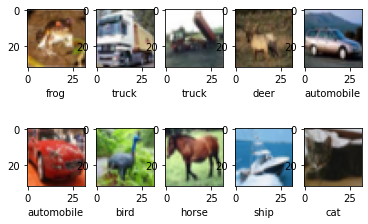

In [3]:
import matplotlib.pyplot as plt
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

for i in range(10):
    # define subplot
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.xlabel(labelNames[int(y_train[i])])
plt.show()

Data is of various items, ranging from animals to vehicles. They are also in colour

In [4]:
import pandas as pd
i=0
for i in range(10):
    print(i,'y_train: ', list(y_train).count(i))
print('#'*10)
i=0
for i in range(10):
    print(i,'y_test: ', list(y_test).count(i))

0 y_train:  5000
1 y_train:  5000
2 y_train:  5000
3 y_train:  5000
4 y_train:  5000
5 y_train:  5000
6 y_train:  5000
7 y_train:  5000
8 y_train:  5000
9 y_train:  5000
##########
0 y_test:  1000
1 y_test:  1000
2 y_test:  1000
3 y_test:  1000
4 y_test:  1000
5 y_test:  1000
6 y_test:  1000
7 y_test:  1000
8 y_test:  1000
9 y_test:  1000


Model is balanced with the same count for each class

In [5]:
import numpy as np 
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255
from tensorflow.compat.v1.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import SGD
seed = 100
np.random.seed(seed)

# Model 1, incrementally increasing Conv2D

In [7]:
#model 1
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
optim=SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

2021-11-21 01:24:39.055058: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-21 01:24:39.155034: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-21 01:24:39.156168: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-21 01:24:39.158016: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [8]:
callback=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history = model.fit(X_train, y_train, epochs=100, batch_size=80, validation_split=0.2, verbose=2, callbacks=callback)

2021-11-21 01:24:43.419401: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2021-11-21 01:24:44.805240: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


500/500 - 10s - loss: 1.7938 - accuracy: 0.3621 - val_loss: 1.5790 - val_accuracy: 0.4432
Epoch 2/100
500/500 - 2s - loss: 1.4632 - accuracy: 0.4800 - val_loss: 1.4356 - val_accuracy: 0.4942
Epoch 3/100
500/500 - 2s - loss: 1.3071 - accuracy: 0.5380 - val_loss: 1.2884 - val_accuracy: 0.5496
Epoch 4/100
500/500 - 2s - loss: 1.1926 - accuracy: 0.5799 - val_loss: 1.2298 - val_accuracy: 0.5674
Epoch 5/100
500/500 - 2s - loss: 1.1023 - accuracy: 0.6161 - val_loss: 1.1544 - val_accuracy: 0.6009
Epoch 6/100
500/500 - 2s - loss: 1.0348 - accuracy: 0.6413 - val_loss: 1.1001 - val_accuracy: 0.6212
Epoch 7/100
500/500 - 2s - loss: 0.9741 - accuracy: 0.6631 - val_loss: 1.0825 - val_accuracy: 0.6233
Epoch 8/100
500/500 - 2s - loss: 0.9210 - accuracy: 0.6808 - val_loss: 1.0238 - val_accuracy: 0.6497
Epoch 9/100
500/500 - 2s - loss: 0.8742 - accuracy: 0.6979 - val_loss: 1.0210 - val_accuracy: 0.6480
Epoch 10/100
500/500 - 2s - loss: 0.8258 - accuracy: 0.7160 - val_loss: 0.9981 - val_accuracy: 0.6543


In [9]:
scores=model.evaluate(X_test,y_test,verbose=0)
print('CNN error: %.2f%%'%(100-scores[1]*100))

CNN error: 32.93%


Very bad accuracy since error is at 30%, precision is also not good.

In [10]:
from sklearn.metrics import classification_report

predictedL = np.argmax(model.predict(X_test), axis=1)
actualL = np.argmax(y_test, axis=1)
print(classification_report(actualL, predictedL, target_names=labelNames))

              precision    recall  f1-score   support

    airplane       0.70      0.72      0.71      1000
  automobile       0.78      0.79      0.78      1000
        bird       0.54      0.53      0.54      1000
         cat       0.50      0.48      0.49      1000
        deer       0.62      0.61      0.62      1000
         dog       0.57      0.56      0.57      1000
        frog       0.72      0.75      0.73      1000
       horse       0.74      0.73      0.73      1000
        ship       0.78      0.80      0.79      1000
       truck       0.75      0.74      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



Accuracy and error curves do not intersect, but instead form an almost parallel line after 20 epochs.

This could mean that there is problems with overfitting

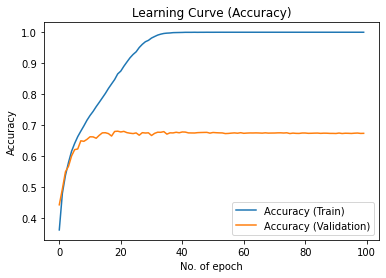

In [11]:
import matplotlib.pyplot as plt
# Plot history: Accuracy
plt.plot(history.history['accuracy'], label = 'Accuracy (Train)')
plt.plot(history.history['val_accuracy'], label = 'Accuracy (Validation)')
plt.title('Learning Curve (Accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('No. of epoch')
plt.legend(loc='lower right')
plt.show()

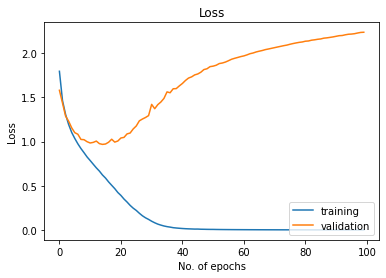

In [12]:
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.title("Loss")
plt.ylabel('Loss')
plt.xlabel('No. of epochs')
plt.legend(loc='lower right')
plt.show()

# Model 2
### VGG Like Model
VGG is an image classification model.
A modified version with fewer pairs of Conv2D is used here

In [13]:
#enumulate VGG, model 2
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
callback=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)
history = model.fit(X_train, y_train, epochs=100, batch_size=80, 
                    validation_split=0.2, verbose=2, callbacks=callback)

Epoch 1/100
500/500 - 5s - loss: 1.9123 - accuracy: 0.2999 - val_loss: 1.6021 - val_accuracy: 0.4226
Epoch 2/100
500/500 - 3s - loss: 1.5600 - accuracy: 0.4298 - val_loss: 1.4307 - val_accuracy: 0.4821
Epoch 3/100
500/500 - 3s - loss: 1.4103 - accuracy: 0.4898 - val_loss: 1.4170 - val_accuracy: 0.4940
Epoch 4/100
500/500 - 3s - loss: 1.3035 - accuracy: 0.5329 - val_loss: 1.2563 - val_accuracy: 0.5511
Epoch 5/100
500/500 - 3s - loss: 1.2145 - accuracy: 0.5691 - val_loss: 1.1858 - val_accuracy: 0.5842
Epoch 6/100
500/500 - 3s - loss: 1.1400 - accuracy: 0.5972 - val_loss: 1.1557 - val_accuracy: 0.5955
Epoch 7/100
500/500 - 3s - loss: 1.0710 - accuracy: 0.6225 - val_loss: 1.0851 - val_accuracy: 0.6177
Epoch 8/100
500/500 - 3s - loss: 1.0081 - accuracy: 0.6475 - val_loss: 1.0423 - val_accuracy: 0.6303
Epoch 9/100
500/500 - 3s - loss: 0.9599 - accuracy: 0.6637 - val_loss: 0.9630 - val_accuracy: 0.6633
Epoch 10/100
500/500 - 3s - loss: 0.9113 - accuracy: 0.6817 - val_loss: 0.9597 - val_accura

In [15]:
scores=model.evaluate(X_test,y_test,verbose=0)
print('CNN error: %.2f%%'%(100-scores[1]*100))

CNN error: 25.44%


Error and precision is better. It can be said that the model has improved

In [16]:
predictedL = np.argmax(model.predict(X_test), axis=1)
actualL = np.argmax(y_test, axis=1)
print(classification_report(actualL, predictedL, target_names=labelNames))

              precision    recall  f1-score   support

    airplane       0.76      0.80      0.78      1000
  automobile       0.85      0.85      0.85      1000
        bird       0.63      0.66      0.64      1000
         cat       0.55      0.55      0.55      1000
        deer       0.75      0.65      0.69      1000
         dog       0.63      0.68      0.65      1000
        frog       0.85      0.77      0.81      1000
       horse       0.76      0.82      0.79      1000
        ship       0.88      0.83      0.85      1000
       truck       0.82      0.85      0.83      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



As the error curve for test set diverges further from the train set after subsequent epochs, this means that there is problems with overfitting after around 25 epochs

Further improvements will need to be made

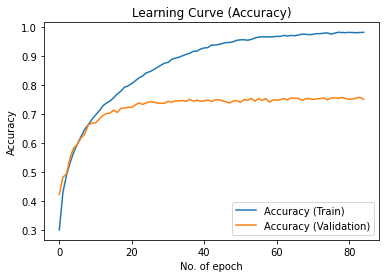

In [17]:
plt.plot(history.history['accuracy'], label = 'Accuracy (Train)')
plt.plot(history.history['val_accuracy'], label = 'Accuracy (Validation)')
plt.title('Learning Curve (Accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('No. of epoch')
plt.legend(loc='lower right')
plt.show()

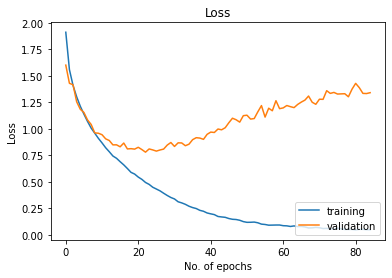

In [18]:
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.title("Loss")
plt.ylabel('Loss')
plt.xlabel('No. of epochs')
plt.legend(loc='lower right')
plt.show()

# Model 3
### Batch Normalized model

In [19]:
#model 3
from tensorflow.keras.layers import BatchNormalization
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train, epochs=100, batch_size=80, validation_split=0.2, verbose=2, callbacks=callback)

Epoch 1/100
500/500 - 8s - loss: 1.6568 - accuracy: 0.4229 - val_loss: 1.3479 - val_accuracy: 0.5124
Epoch 2/100
500/500 - 4s - loss: 1.2277 - accuracy: 0.5612 - val_loss: 1.1655 - val_accuracy: 0.5854
Epoch 3/100
500/500 - 4s - loss: 1.0592 - accuracy: 0.6255 - val_loss: 1.0855 - val_accuracy: 0.6256
Epoch 4/100
500/500 - 4s - loss: 0.9419 - accuracy: 0.6676 - val_loss: 1.0455 - val_accuracy: 0.6331
Epoch 5/100
500/500 - 5s - loss: 0.8525 - accuracy: 0.7003 - val_loss: 0.9553 - val_accuracy: 0.6657
Epoch 6/100
500/500 - 5s - loss: 0.7746 - accuracy: 0.7295 - val_loss: 0.9887 - val_accuracy: 0.6498
Epoch 7/100
500/500 - 4s - loss: 0.7071 - accuracy: 0.7555 - val_loss: 0.9162 - val_accuracy: 0.6797
Epoch 8/100
500/500 - 5s - loss: 0.6465 - accuracy: 0.7758 - val_loss: 0.9063 - val_accuracy: 0.6889
Epoch 9/100
500/500 - 4s - loss: 0.5923 - accuracy: 0.7959 - val_loss: 0.8921 - val_accuracy: 0.6977
Epoch 10/100
500/500 - 4s - loss: 0.5418 - accuracy: 0.8149 - val_loss: 0.8836 - val_accura

In [21]:
scores=model.evaluate(X_test,y_test,verbose=0)
print('CNN error: %.2f%%'%(100-scores[1]*100))

CNN error: 27.39%


Precision and error is worse than previously, will need to check the learning curves to see if the model has problems with fit

In [22]:
predictedL = np.argmax(model.predict(X_test), axis=1)
actualL = np.argmax(y_test, axis=1)
print(classification_report(actualL, predictedL, target_names=labelNames))

              precision    recall  f1-score   support

    airplane       0.75      0.76      0.76      1000
  automobile       0.82      0.83      0.83      1000
        bird       0.65      0.64      0.65      1000
         cat       0.54      0.50      0.52      1000
        deer       0.68      0.68      0.68      1000
         dog       0.62      0.64      0.63      1000
        frog       0.76      0.80      0.78      1000
       horse       0.78      0.77      0.77      1000
        ship       0.82      0.84      0.83      1000
       truck       0.81      0.80      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.72      0.73      0.73     10000
weighted avg       0.72      0.73      0.73     10000



As the curves for the error do not diverge as rapidly as previously, the fit is probably better

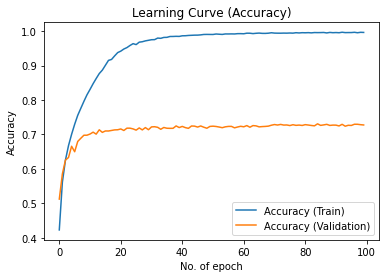

In [23]:
plt.plot(history.history['accuracy'], label = 'Accuracy (Train)')
plt.plot(history.history['val_accuracy'], label = 'Accuracy (Validation)')
plt.title('Learning Curve (Accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('No. of epoch')
plt.legend(loc='lower right')
plt.show()

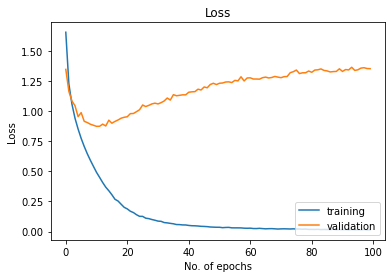

In [24]:
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.title("Loss")
plt.ylabel('Loss')
plt.xlabel('No. of epochs')
plt.legend(loc='lower right')
plt.show()

# Model 4

Dropout and batch normalization layers will be added for this model

In [25]:
#model 4, dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(X_train, y_train, epochs=100, batch_size=80, validation_split=0.2, verbose=2, callbacks=callback)

Epoch 1/100
500/500 - 6s - loss: 1.7363 - accuracy: 0.3959 - val_loss: 1.4859 - val_accuracy: 0.4537
Epoch 2/100
500/500 - 5s - loss: 1.3373 - accuracy: 0.5224 - val_loss: 1.2926 - val_accuracy: 0.5382
Epoch 3/100
500/500 - 5s - loss: 1.1981 - accuracy: 0.5733 - val_loss: 1.1900 - val_accuracy: 0.5782
Epoch 4/100
500/500 - 5s - loss: 1.0991 - accuracy: 0.6084 - val_loss: 1.1760 - val_accuracy: 0.5830
Epoch 5/100
500/500 - 4s - loss: 1.0263 - accuracy: 0.6348 - val_loss: 1.0891 - val_accuracy: 0.6136
Epoch 6/100
500/500 - 4s - loss: 0.9665 - accuracy: 0.6582 - val_loss: 1.0145 - val_accuracy: 0.6469
Epoch 7/100
500/500 - 5s - loss: 0.9171 - accuracy: 0.6738 - val_loss: 1.0679 - val_accuracy: 0.6232
Epoch 8/100
500/500 - 4s - loss: 0.8816 - accuracy: 0.6898 - val_loss: 0.9113 - val_accuracy: 0.6773
Epoch 9/100
500/500 - 4s - loss: 0.8412 - accuracy: 0.7021 - val_loss: 0.8786 - val_accuracy: 0.6864
Epoch 10/100
500/500 - 5s - loss: 0.8100 - accuracy: 0.7157 - val_loss: 0.8590 - val_accura

In [27]:
scores=model.evaluate(X_test,y_test,verbose=0)
print('CNN error: %.2f%%'%(100-scores[1]*100))

CNN error: 18.05%


Error has improved, so has the precision.
Model seems to have problems identifying cats the most

In [28]:
predictedL = np.argmax(model.predict(X_test), axis=1)
actualL = np.argmax(y_test, axis=1)
print(classification_report(actualL, predictedL, target_names=labelNames))

              precision    recall  f1-score   support

    airplane       0.85      0.85      0.85      1000
  automobile       0.93      0.87      0.90      1000
        bird       0.82      0.71      0.76      1000
         cat       0.66      0.66      0.66      1000
        deer       0.77      0.81      0.79      1000
         dog       0.76      0.70      0.73      1000
        frog       0.82      0.90      0.86      1000
       horse       0.88      0.86      0.87      1000
        ship       0.87      0.93      0.90      1000
       truck       0.85      0.91      0.88      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



The curves for both test and train sets are similiar up until a point where they diverge like previous models
However, the divergence is after quite a number of epochs.
Model has probably improved

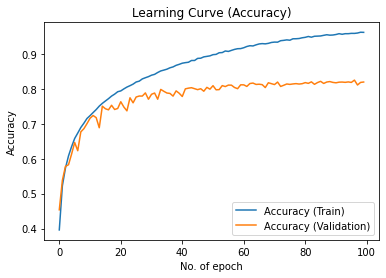

In [29]:
plt.plot(history.history['accuracy'], label = 'Accuracy (Train)')
plt.plot(history.history['val_accuracy'], label = 'Accuracy (Validation)')
plt.title('Learning Curve (Accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('No. of epoch')
plt.legend(loc='lower right')
plt.show()

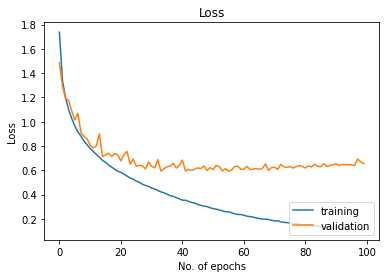

In [30]:
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.title("Loss")
plt.ylabel('Loss')
plt.xlabel('No. of epochs')
plt.legend(loc='lower right')
plt.show()

# Model 5
Model 5 will use a larger dropout rate of 0.4

In [31]:
#model 5
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit(X_train, y_train, epochs=100, batch_size=80, validation_split=0.2, verbose=2, callbacks=callback)

Epoch 1/100
500/500 - 7s - loss: 2.0024 - accuracy: 0.3065 - val_loss: 1.8097 - val_accuracy: 0.3304
Epoch 2/100
500/500 - 5s - loss: 1.5575 - accuracy: 0.4307 - val_loss: 1.4605 - val_accuracy: 0.4670
Epoch 3/100
500/500 - 4s - loss: 1.4139 - accuracy: 0.4836 - val_loss: 1.4279 - val_accuracy: 0.4797
Epoch 4/100
500/500 - 5s - loss: 1.3171 - accuracy: 0.5224 - val_loss: 1.3241 - val_accuracy: 0.5244
Epoch 5/100
500/500 - 4s - loss: 1.2510 - accuracy: 0.5497 - val_loss: 1.4079 - val_accuracy: 0.4940
Epoch 6/100
500/500 - 5s - loss: 1.1898 - accuracy: 0.5709 - val_loss: 1.2024 - val_accuracy: 0.5542
Epoch 7/100
500/500 - 5s - loss: 1.1438 - accuracy: 0.5884 - val_loss: 1.0971 - val_accuracy: 0.5978
Epoch 8/100
500/500 - 4s - loss: 1.0986 - accuracy: 0.6066 - val_loss: 1.1457 - val_accuracy: 0.5888
Epoch 9/100
500/500 - 5s - loss: 1.0621 - accuracy: 0.6211 - val_loss: 1.1923 - val_accuracy: 0.5734
Epoch 10/100
500/500 - 5s - loss: 1.0334 - accuracy: 0.6294 - val_loss: 1.1152 - val_accura

In [34]:
scores=model.evaluate(X_test,y_test,verbose=0)
print('CNN error: %.2f%%'%(100-scores[1]*100))

CNN error: 19.02%


Although accuracy is worse, the range of precision for each class is not as great as previous models
The error is also quite good, now down to 2 thirds of the origional model

In [33]:
predictedL = np.argmax(model.predict(X_test), axis=1)
actualL = np.argmax(y_test, axis=1)
print(classification_report(actualL, predictedL, target_names=labelNames))

              precision    recall  f1-score   support

    airplane       0.88      0.76      0.81      1000
  automobile       0.95      0.85      0.90      1000
        bird       0.83      0.65      0.73      1000
         cat       0.70      0.63      0.66      1000
        deer       0.69      0.87      0.77      1000
         dog       0.74      0.74      0.74      1000
        frog       0.77      0.92      0.84      1000
       horse       0.89      0.83      0.86      1000
        ship       0.86      0.93      0.89      1000
       truck       0.86      0.91      0.89      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000



Test error curve does not diverge greatly from the train curve but insetead adheres to it quit well. 
This is the best model created here

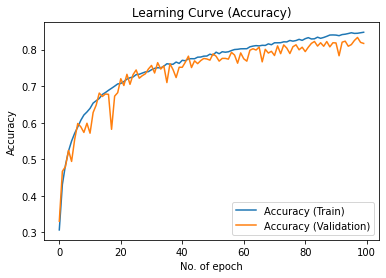

In [35]:
plt.plot(history.history['accuracy'], label = 'Accuracy (Train)')
plt.plot(history.history['val_accuracy'], label = 'Accuracy (Validation)')
plt.title('Learning Curve (Accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('No. of epoch')
plt.legend(loc='lower right')
plt.show()

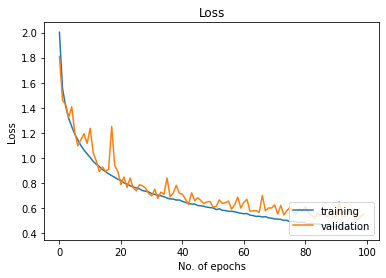

In [36]:
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.title("Loss")
plt.ylabel('Loss')
plt.xlabel('No. of epochs')
plt.legend(loc='lower right')
plt.show()